### Overview
- Challenge: create an algorithm to automate nucleus detection


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/'

- unzip the files

In [ ]:
#!unzip -qq '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_train_labels.csv.zip' -d '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/'

In [ ]:
#!unzip -qq '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_solution.csv.zip' -d '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/'

In [ ]:
#!unzip -qq '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_sample_submission.csv.zip' -d '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/'

In [ ]:
#!unzip -qq '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage2_sample_submission_final.csv.zip' -d '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/'

In [ ]:
#!unzip -qq '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_train.zip' -d '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_train'

In [ ]:
#!unzip -qq '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_test.zip' -d '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_test'

In [ ]:
#!unzip -qq '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage2_test_final.zip' -d '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage2_test_final'

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import os
from skimage.io import imread
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
dsb_data_dir = os.path.join(data_path)
stage_label = 'stage1'

### Read in the labels

In [ ]:
train_labels = pd.read_csv(os.path.join(dsb_data_dir,
                                        '{}_train_labels.csv'.format(stage_label)))  # stage1_train_labels.csv 불러오기
print(train_labels.shape)
train_labels.head()

(29461, 2)


,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...
3,00071198d059ba7f5914a526d124d28e6d010c92466da2...,18671 6 18926 8 19181 9 19436 10 19691 11 1994...
4,00071198d059ba7f5914a526d124d28e6d010c92466da2...,40158 3 40413 5 40669 5 40925 5 41182 3


- **stage1_train_labels.csv**: a file showing the run-length encoded representation of the training images. This is provided as a convenience and is redundant with the mask image files.

In [ ]:
len(train_labels.ImageId.unique())

670

- 670개의 image에 대한 encoded pixels
- 각 이미지에서 검출된 masks에 대한 pixels 인듯

In [ ]:
29461/670

43.971641791044775

- 약 44개의 이미지

In [ ]:
train_labels['EncodedPixels'] = train_labels['EncodedPixels'].map(lambda ep: [int(x) for x in ep.split(' ')])   # 공백을 기준으로 split해서 정수화
train_labels.sample(3)

,ImageId,EncodedPixels
16520,8efed2e62c919e6d70a2ab548b1a33014877fe8a23f177...,"[255874, 5, 256393, 7, 256912, 9, 257430, 12, ..."
20347,aa47f0b303b1d525b52452ae3a8553b2d61d719a28aee5...,"[31992, 8, 32245, 12, 32499, 14, 32753, 16, 33..."
20982,af6b6173c59450bc76b2cc461cf233921fbfdb6feb8dd6...,"[76864, 7, 77119, 11, 77373, 14, 77628, 16, 77..."


- 공백을 기준으로 숫자들이 저장되었던 EncodedPixels가 comma를 기준으로 split되어있음!

### Load in all Images

In [ ]:
all_images = glob(os.path.join(dsb_data_dir, 'stage1_*', '*', '*', '*'))   # stage1_으로 시작하는 디렉토리를 모두 선택

In [ ]:
all_images[:10]     # 경로가 저장됨!

['/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_test/336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523/images (1)/336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523.png',
 '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_test/336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523/images/336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523.png',
 '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_test/a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f/images (1)/a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f.png',
 '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_test/a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f/images/a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f.png',
 '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA

In [ ]:
img_df = pd.DataFrame({'path': all_images})
img_id = lambda in_path: in_path.split('/')[-3]    #img_df에 저장된 파일 경로를 /로 나누어 마지막에서 세번째
img_type = lambda in_path: in_path.split('/')[-2]     # lambda 식을 img_type에 저장해주는 것...! 신기방기
img_group = lambda in_path: in_path.split('/')[-4].split('_')[1]
img_stage = lambda in_path: in_path.split('/')[-4].split('_')[0]

In [ ]:
img_df['ImageId']=img_df['path'].map(img_id)
img_df['ImageType']=img_df['path'].map(img_type)
img_df['TrainingSplit']=img_df['path'].map(img_group)
img_df['Stage']=img_df['path'].map(img_stage)

img_df.sample(10)

In [ ]:
img_df['Stage'].unique()

array(['stage1'], dtype=object)

In [ ]:
img_df['TrainingSplit'].unique()

array(['test', 'train'], dtype=object)

### Create Training Data

In [ ]:
%%time
train_df = img_df.query('TrainingSplit=="train"')

train_rows = []
group_cols = ['Stage', 'ImageId']

for n_group, n_rows in train_df.groupby(group_cols):   # Stage와 ImageId로 groupby
  c_row = {col_name: col_value for col_name,col_value in zip(group_cols, n_group)}
  c_row['masks'] = n_rows.query('ImageType == "masks"')['path'].values.tolist()
  c_row['images'] = n_rows.query('ImageType == "images"')['path'].values.tolist()

  train_rows += [c_row]    # c_row를 train_rows에 추가

CPU times: user 2.19 s, sys: 53 ms, total: 2.24 s
Wall time: 2.2 s


In [ ]:
train_rows[0]     # ImageId에 대한 masks 경로들 저장    # Stage, ImageId, masks, images가 variable

{'Stage': 'stage1',
 'ImageId': '00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552',
 'masks': ['/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/aa154c70e0d82669e9e492309bd00536d2b0f6eeec1210014bbafbfc554b377c.png',
  '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/7ff04129f8b6d9aaf47e062eadce8b3fcff8b4a29ec5ad92bca926ac2b7263d2.png',
  '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/4e3b49fb14877b63704881a923365b68c1def111c58f23c66daa49fef4b632bf.png',
  '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/Objectsegmentation_NC/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/07a9bf1d7594af2763

In [ ]:
def read_and_stack(in_img_list):
  return np.sum(np.stack([imread(c_img) for c_img in in_img_list], 0), 0)/255.0  # in_img_list의 요소들을 read해서 stack한 후 sum

In [ ]:
IMG_CHANNELS=3

train_img_df = pd.DataFrame(train_rows)
train_img_df['images'] = train_img_df.loc[:50, 'images'].map(read_and_stack).map(lambda x: x[:,:,:IMG_CHANNELS])

In [ ]:
train_img_df['masks'] = train_img_df.loc[:50, 'masks'].map(read_and_stack).map(lambda x: x.astype(int))

- 시간이 너무 오래걸려서 처음 50개만 사용

In [ ]:
#train_img_df['masks'] = train_img_df['masks'].map(read_and_stack).map(lambda x: x.astype(int))
#train_img_df.sample(1)

In [ ]:
train_img_df.head(10)

,Stage,ImageId,masks,images
0,stage1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0.0196078431372549, 0.0196078431372549, 0.0..."
1,stage1,003cee89357d9fe13516167fd67b609a164651b2193458...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0.0196078431372549, 0.0196078431372549, 0.0..."
2,stage1,00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b074...,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,...","[[[0.5098039215686274, 0.24313725490196078, 0...."
3,stage1,0121d6759c5adb290c8e828fc882f37dfaf3663ec885c6...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0.7019607843137254, 0.6235294117647059, 0.7..."
4,stage1,01d44a26f6680c42ba94c9bc6339228579a95d0e2695b1...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0.6784313725490196, 0.615686274509804, 0.76..."
5,stage1,0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0.047058823529411764, 0.047058823529411764,..."
6,stage1,0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0.00784313725490196, 0.00784313725490196, 0..."
7,stage1,02903040e19ddf92f452907644ad3822918f54af41dd85...,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[[0.09411764705882353, 0.09411764705882353, 0..."
8,stage1,03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0.050980392156862744, 0.050980392156862744,..."
9,stage1,03b9306f44e9b8951461623dcbd615550cdcf36ea93b20...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0.03137254901960784, 0.03137254901960784, 0..."


In [ ]:
train_img_df = train_img_df[:50]

### Show a few images

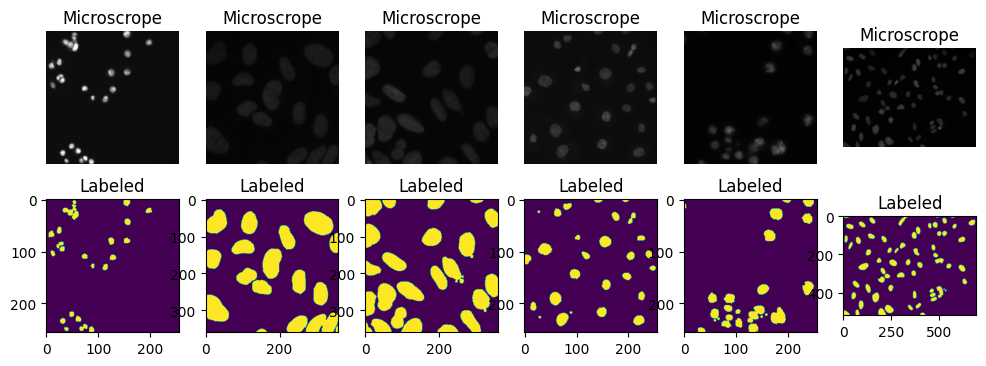

In [ ]:
n_img = 6
fig, m_axis = plt.subplots(2, n_img, figsize=(12,4))

for (_, c_row), (c_im, c_lab) in zip(train_img_df.sample(n_img).iterrows(), m_axis.T):    # (sample의 인덱스, 데이터), (m_axis의 열, m_axis의 행)
  c_im.imshow(c_row['images'])   # c_im에는 images
  c_im.axis('off')
  c_im.set_title('Microscrope')

  c_lab.imshow(c_row['masks'])   # c_lab에는 masks
  c_lab.axis='off'
  c_lab.set_title('Labeled')

- iterrows(): 데이터 프레임의 각 행에 대한 인덱스와 데이터를 반환
- .T: transpose

### Look at the intensity distribution

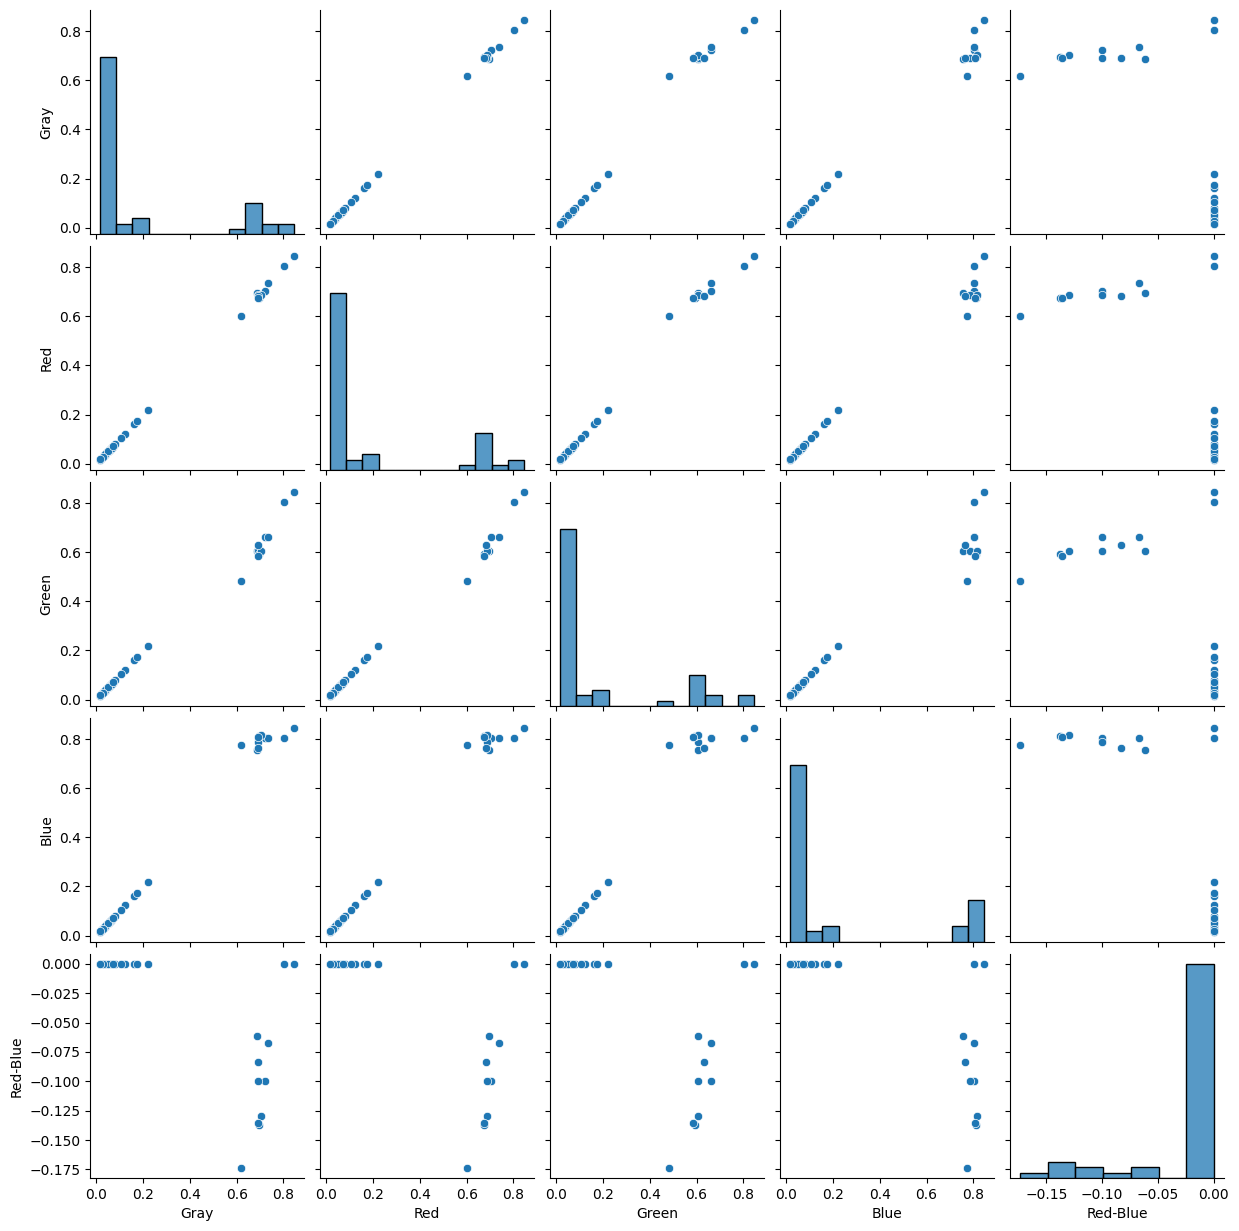

In [ ]:
train_img_df['Red'] = train_img_df['images'].map(lambda x: np.mean(x[:, :, 0]))
train_img_df['Green'] = train_img_df['images'].map(lambda x: np.mean(x[:, :, 1]))
train_img_df['Blue'] = train_img_df['images'].map(lambda x: np.mean(x[:, :, 2]))
train_img_df['Gray'] = train_img_df['images'].map(lambda x: np.mean(x))

train_img_df['Red-Blue'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,0]-x[:,:,2]))

sns.pairplot(train_img_df[['Gray', 'Red', 'Green', 'Blue', 'Red-Blue']])

- separated하게 분포됨
- 처음 50개의 데이터만 다뤘지만 거의 비슷하게 분포가 나옴!

### Check dimensions

In [ ]:
train_img_df['images'].map(lambda x: x.shape).value_counts()    # shape을 value_count

images
(256, 256, 3)      25
(256, 320, 3)       9
(360, 360, 3)       8
(520, 696, 3)       5
(1024, 1024, 3)     2
(260, 347, 3)       1
Name: count, dtype: int64

- shape들이 다 다르다!!

### Making a simple CNN

In [ ]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, UpSampling2D, Lambda

simple_cnn = Sequential()
simple_cnn.add(BatchNormalization(input_shape = (None, None, IMG_CHANNELS), name='NormalizeInput'))   # shape이 모두 다르므로 None, None, IMG_CHANNELS로 설정
simple_cnn.add(Conv2D(8, kernel_size=(3,3), padding='same'))
simple_cnn.add(Conv2D(8, kernel_size=(3,3), padding='same'))

# use dilations to get a slightly larger field of view
simple_cnn.add(Conv2D(16, kernel_size=(3,3), dilation_rate=2, padding='same'))
simple_cnn.add(Conv2D(16, kernel_size=(3,3), dilation_rate=2, padding='same'))
simple_cnn.add(Conv2D(32, kernel_size=(3,3), dilation_rate=3, padding='same'))

# the final processing
simple_cnn.add(Conv2D(16, kernel_size=(1,1), padding='same'))
simple_cnn.add(Conv2D(1, kernel_size=(1,1), padding='same', activation='sigmoid'))

In [ ]:
simple_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NormalizeInput (BatchNorma  (None, None, None, 3)     12        
 lization)                                                       
                                                                 
 conv2d (Conv2D)             (None, None, None, 8)     224       
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 8)     584       
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 16)    1168      
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 16)    2320      
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 32)    4640      
                                                        

### Loss

In [ ]:
'''
from keras import backend as K
smooth = 1.

def dice_coef(y_true, y_pred):
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = K.sum(y_true_f * y_pred_f)
  return (2*intersection + smooth) / (K.sum(y_true_f)+K.sum(y_pred_f)+smooth)    # smooth를 더하는 이유: 분모가 0이 되는 것을 방지

def dice_coef_loss(y_true, y_pred):
  return -dice_coef(y_true, y_pred)    # -dice coef = dice coeff loss

simple_cnn.compile(optimizer = 'adam',
                   loss = dice_coef_loss,
                   metrics = [dice_coef, 'acc', 'mse'])
'''

"\nfrom keras import backend as K\nsmooth = 1.\n\ndef dice_coef(y_true, y_pred):\n  y_true_f = K.flatten(y_true)\n  y_pred_f = K.flatten(y_pred)\n  intersection = K.sum(y_true_f * y_pred_f)\n  return (2*intersection + smooth) / (K.sum(y_true_f)+K.sum(y_pred_f)+smooth)    # smooth를 더하는 이유: 분모가 0이 되는 것을 방지\n\ndef dice_coef_loss(y_true, y_pred):\n  return -dice_coef(y_true, y_pred)    # -dice coef = dice coeff loss\n\nsimple_cnn.compile(optimizer = 'adam',\n                   loss = dice_coef_loss,\n                   metrics = [dice_coef, 'acc', 'mse'])\n"

In [ ]:
from keras import backend as K
smooth = 1.

def dice_coef(y_true, y_pred):
    y_true = K.cast(y_true, dtype='float32')
    y_pred = K.cast(y_pred, dtype='float32')
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)    # 교차합
    return (2*intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    y_true = K.cast(y_true, dtype='float32')
    y_pred = K.cast(y_pred, dtype='float32')
    return -dice_coef(y_true, y_pred)

simple_cnn.compile(optimizer='adam',
                   loss=dice_coef_loss,
                   metrics=[dice_coef, 'acc', 'mse'])

- dtype 관련 오류가 자꾸 나서 ChatGPT 참고해서 코드 수정..

### Simple Training

In [ ]:
def simple_gen():
  while True:
    for _, c_row in train_img_df.iterrows():
      yield np.expand_dims(c_row['images'], 0),np.expand_dims(np.expand_dims(c_row['masks'], -1), 0)

simple_cnn.fit_generator(simple_gen(),
                         steps_per_epoch = train_img_df.shape[0],
                         epochs=3)

Epoch 1/3


<ipython-input-36-61220264c832>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  simple_cnn.fit_generator(simple_gen(),


50/50 [==============================] - 16s 164ms/step - loss: -0.4996 - dice_coef: 0.4996 - acc: 0.6743 - mse: 0.3096
Epoch 2/3
50/50 [==============================] - 1s 16ms/step - loss: -0.5933 - dice_coef: 0.5933 - acc: 0.7192 - mse: 0.2766
Epoch 3/3
50/50 [==============================] - 1s 16ms/step - loss: -0.7097 - dice_coef: 0.7097 - acc: 0.7334 - mse: 0.2618


### Apply Model to Test

In [ ]:
%%time
test_df = img_df.query('TrainingSplit=="test"')
test_rows = []

group_cols = ['Stage', 'ImageId']

for n_group, n_rows in test_df.groupby(group_cols):
  c_row = {col_name: col_value for col_name, col_value in zip(group_cols, n_group)}
  c_row['images'] = n_rows.query('ImageType=="images"')

CPU times: user 122 ms, sys: 8.06 ms, total: 130 ms
Wall time: 129 ms


In [ ]:
%%time
test_df = img_df.query('TrainingSplit=="test"')

test_rows = []
group_cols = ['Stage', 'ImageId']

for n_group, n_rows in test_df.groupby(group_cols):
  c_row = {col_name: col_value for col_name,col_value in zip(group_cols, n_group)}
  c_row['masks'] = n_rows.query('ImageType == "masks"')['path'].values.tolist()
  c_row['images'] = n_rows.query('ImageType == "images"')['path'].values.tolist()

  test_rows += [c_row]

CPU times: user 223 ms, sys: 3.98 ms, total: 227 ms
Wall time: 224 ms


In [ ]:
test_img_df = pd.DataFrame(test_rows)
test_img_df['images'] = test_img_df['images'].map(read_and_stack).map(lambda x: x[:,:, :IMG_CHANNELS])
print(test_img_df.shape[0], 'images to process')
test_img_df.sample(1)

65 images to process


,Stage,ImageId,masks,images
55,stage1,d8d4bf68a76e4e4c5f21de7ac613451f7115a04db68615...,[],"[[[0.050980392156862744, 0.050980392156862744,..."


In [ ]:
%%time
test_img_df['masks'] = test_img_df['images'].map(lambda x: simple_cnn.predict(np.expand_dims(x, 0))[0, :, :, 0])

1/1 [==============================] - 0s 20ms/step
CPU times: user 8.03 s, sys: 251 ms, total: 8.28 s
Wall time: 8.59 s


### Show a few predictions

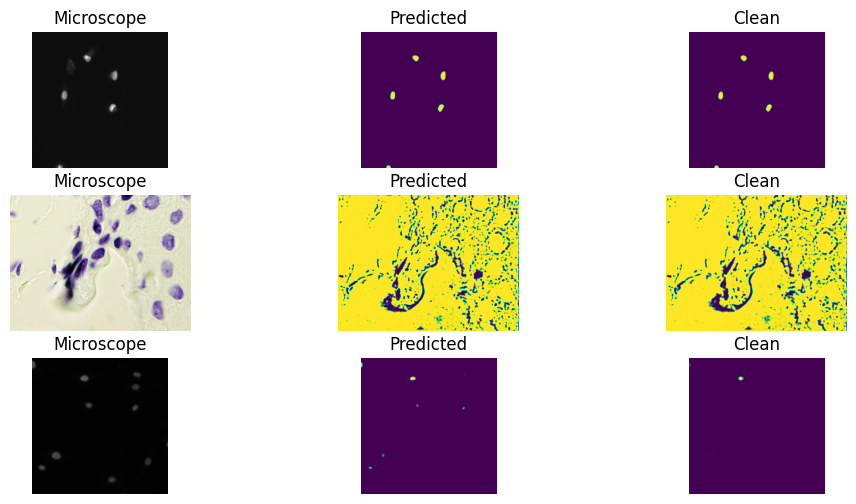

In [ ]:
n_img = 3
from skimage.morphology import closing, opening, disk

def clean_img(x):
  return opening(closing(x, disk(1)), disk(3))

fig, m_axis = plt.subplots(3, n_img, figsize=(12,6))

for (_, d_row), (c_im, c_lab, c_clean) in zip(test_img_df.sample(n_img).iterrows(), m_axis):
  c_im.imshow(d_row['images'])
  c_im.axis('off')
  c_im.set_title('Microscope')

  c_lab.imshow(d_row['masks'])
  c_lab.axis('off')
  c_lab.set_title('Predicted')

  c_clean.imshow(clean_img(d_row['masks']))
  c_clean.axis('off')
  c_clean.set_title('Clean')

### Check RLE

In [ ]:
from skimage.morphology import label
def rle_encoding(x):
  dots = np.where(x.T.flatten()==1)[0]
  run_lengths = []
  prev=-2

  for b in dots:
    if (b>prev+1): run_lengths.extend((b+1, 0))
    run_lengths[-1] +=1   # run_lengths의 마지막에 1 추가
    prev = b

def prob_to_rles(x, cut_off=0.5):
  lab_img = label(x>cut_off)   # cut_off보다 높은 데이터의 label을 lab_img에 저장
  if lab_img.max()<1:   # 만일 어떤 레이블도 없는 경우
    lab_img[0,0] =1    # 첫번째 픽셀을 레이블 1로 설정 -> 최소한 하나라도 생기게
  for i in range(1, lab_img.max()+1):
    yield rle_encoding(lab_img==i)

- RLE 코드
  - https://www.kaggle.com/code/rakhlin/fast-run-length-encoding-python
- RLE란?
  - 이미지나 비디오 데이터를 압축하는 데 사용하는 압축 알고리즘
  - 연속된 픽셀 값이 반복되는 경우, 그 값을 반복되는 횟수와 함께 저장해 데이터 압축 -> 데이터 용량 축소 가능
  - ex. 11111000 -> 1503

In [ ]:
# calculate the RLEs for a Train Image
_, train_rle_row = next(train_img_df.tail(5).iterrows())    # 마지막 5행의 index와 데이터 값들
train_row_rles = list(prob_to_rles(train_rle_row['masks']))    # 위에서 만든 데이터의 masks로 RLEs values 계산

In [ ]:
train_rle_row['masks']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
train_row_rles

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
# Take the RLEs from the CSV
tl_rles = train_labels.query('ImageId=="{ImageId}"'.format(**train_rle_row))['EncodedPixels']

In [ ]:
tl_rles

2176    [14728, 9, 15245, 13, 15761, 18, 16279, 20, 16...
2177    [240923, 9, 241440, 16, 241958, 20, 242477, 23...
2178    [42390, 7, 42908, 11, 43427, 13, 43946, 15, 44...
2179    [255935, 7, 256452, 12, 256969, 16, 257488, 19...
2180    [313689, 6, 314207, 11, 314726, 13, 315244, 16...
                              ...                        
2238    [231452, 7, 231967, 16, 232485, 20, 233004, 22...
2239    [202014, 5, 202531, 11, 203050, 14, 203569, 17...
2240    [187300, 13, 187817, 19, 188336, 22, 188855, 2...
2241    [114363, 6, 114877, 16, 115396, 19, 115914, 24...
2242    [146954, 5, 147472, 11, 147991, 13, 148510, 15...
Name: EncodedPixels, Length: 67, dtype: object

- tail 5개에 대해 Encoded Pixels를 tl_rles로 저장

In [ ]:
match, mismatch = 0, 0
for img_rle, train_rle in zip(sorted(train_row_rles, key = lambda x: x[0]),
                              sorted(tl_rles, key = lambda x: x[0])):
    for i_x, i_y in zip(img_rle, train_rle):
      if i_x == i_y:
        match +=1   # 같으면 match +1
      else:
        mismatch +=1
print(f"Matches: {match}, Mismatches: {mismatch}, Accuracy: {100*match/(match+mismatch)}")

### Calculate RLE for all the masks

In [ ]:
test_img_df['rles'] = test_img_df['masks'].map(clean_img).map(lambda x: list(prob_to_rles(x)))

In [ ]:
out_pred_list = []
for _, c_row in test_img_df.iterrows():
  for c_rle in c_row['rles']:
    out_pred_list += [dict(ImageId=c_row['ImgeId'],
                           EncodedPixels=' '.join(np.array(c_rle).astype(str)))]
out_pred_df = pd.DataFrame(out_pred_list)
print(out_pred_df.shape[0], 'regions found for', test_img_df.shape[0], 'images')
out_pred_df.sample(3)

In [ ]:
out_pred_df[['ImageId', 'EncodedPixels']].to_csv('predictions.csv', index=False)